# Basic Analysis of Data

In just looking at the data with visualziation we learn a lot, but it's also easy as human to let our prior assumptions get in the way.  So a combination of both statistical tests and direct examination of the data is usually warranted to get a more complete understanding of what's happening. We'd like to be able to do statistical testing to see what the propability is that a difference is significant or could arise by chance

To do this, let's use the `scipy` packages, specifically the `stats` submodule <https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html>

In [2]:
from scipy import stats

To demonstrate - let's consider some "random" distributions, one centered at 100 and one at 200, with a variance of 100.  I'll generate them with a command from the `numpy` module (<https://numpy.org/>) - specifically the `numpy.random.normal` command (<https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html>)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
dists=pd.DataFrame(np.vstack((np.random.normal(100,100,5), np.random.normal(200,100,5))).T, columns=['x', 'y']).melt()
dists

,variable,value
0,x,26.041208
1,x,-28.193787
2,x,259.595580
3,x,156.644232
4,x,51.054038
5,y,13.429090
6,y,250.706686
7,y,361.513210
8,y,174.256304
9,y,22.283612


Let's plot this result:

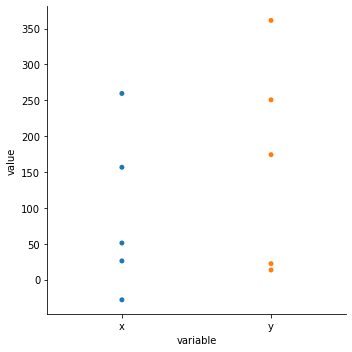

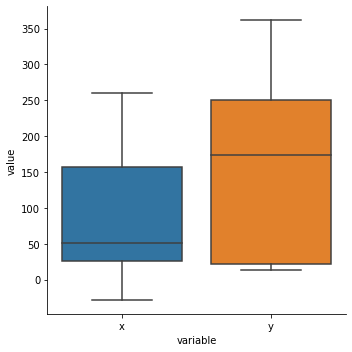

In [66]:
sns.catplot(data=dists, x="variable", y="value", kind="swarm")
sns.catplot(data=dists, x="variable", y="value", kind="box")

We can see that the boxes overlap, and given the high variance I set for the data.  What happens if I increase the number of samples? Instead of 5, let's take 100 samples

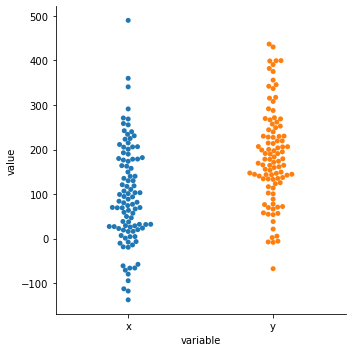

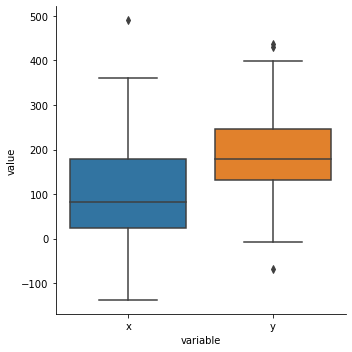

In [68]:
lotsof_dists=pd.DataFrame(np.vstack((np.random.normal(100,100,100), np.random.normal(200,100,100))).T, columns=['x', 'y']).melt()
sns.catplot(data=lotsof_dists, x="variable", y="value", kind="swarm")
sns.catplot(data=lotsof_dists, x="variable", y="value", kind="box")

Better!  What about 1000 samples?

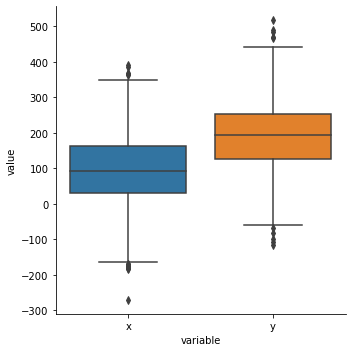

In [70]:
tonsof_dists=pd.DataFrame(np.vstack((np.random.normal(100,100,1000), np.random.normal(200,100,1000))).T, columns=['x', 'y']).melt()
sns.catplot(data=tonsof_dists, x="variable", y="value", kind="box")

The point I'm trying to get across is that the more samples of a population you take (especially for a noisy population) the better your measurement.  If your difference is small (100 in this case) compared to the variance (100), it's hard to tell the difference with a few samples. 

But we don't have to eyeball it.  We can _calculate_ the confidence, the probably that something is different using the t-test.

There are many possible statistical tests, depending on the kind of data you have and the shape of the distributions of the data.  We are _not_ going to have the time to exhaustively examine them here, instead we will show a simple case or two using what is perhaps the simplest statistical test, _Student's t-test_.

The t-test is a type of hypothesis testing. In this case, we are trying to measure if the _null_ hypothesis $H_0$ i.e. that the means of the populations are equal.  You might say - "This is easy to measure - just take the mean of the samples and if they are the same, it's true, and if not, it's false!".  But it's not that simple - because you are _sampling_.  In the real world we only have a certain number of samples - and the samples often make a distribution.  So how far away the means need to be is dependent to some extent on _how many_ samples you have, and therefore how accurately you can estimate the population.

First - let's do a "1-sample" t-test - this checks if the mean of the samples is equal to the expected population mean (`popmean`).

As a reminder, we have 3 samples in memory right now - dists (5 samples each), lotsof_dists (100 samples), and tonsof_dists (1000 samples).  The "x" distribution has a expected mean of 100, and the "y" distribution has an expected mean of 200.  
Let's test using the 1-sample t-test (using `ttest_1samp` <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html>) if the x distribution passes the null hypothesis for an population mean of 100 or for a population mean of 200.

In [82]:
print("5 samples Versus population mean of 100:")
print(stats.ttest_1samp(dists[dists['variable']=="x"].value, popmean=100))
print("5 samples Versus population mean of 200:")
print(stats.ttest_1samp(dists[dists['variable']=="x"].value, popmean=200))

Versus population mean of 100:
Ttest_1sampResult(statistic=-0.13577030720201388, pvalue=0.8985614385931401)
Versus population mean of 200:
Ttest_1sampResult(statistic=-2.0832066118303043, pvalue=0.10563901990879565)


Breaking down these results, we see two numbers - a statistic - specifically a _t-statistic_ which without getting into the math (<https://en.wikipedia.org/wiki/T-statistic>) is a ratio of how far off the mean is compared to the standard error.  The second number - more immediately applicable - is the infamous _p-value_.  A p-value (<https://en.wikipedia.org/wiki/P-value>) in hypothesis testing is the probability that you would see these kind of results, or results more extreme than these, if the null-hypothesis is _true_.  

Importantly, you should use the p-value to _nullify_ or _reject_ the null hypothesis.  So - from the first result - we can't reject the null hypothesis (that the mean of the population is 100).  Nor would I say with _confidence_ that we can reject the null hypothesis that the population mean is 200 (p=0.106), but it is _suggestive_.  All too frequently in scientific work, people are seeking a p-value of 0.05 - i.e. saying that if you pass that 5% chance threshold, you can absolutely rule out the null hypothesis.  

Let's see what happens with the larger samples:

In [83]:
print("100 samples Versus population mean of 100:")
print(stats.ttest_1samp(lotsof_dists[lotsof_dists['variable']=="x"].value, popmean=100))
print("100 samples Versus population mean of 200:")
print(stats.ttest_1samp(lotsof_dists[lotsof_dists['variable']=="x"].value, popmean=200))

100 samples Versus population mean of 100:
Ttest_1sampResult(statistic=-0.24949885666445676, pvalue=0.8034918667251574)
100 samples Versus population mean of 200:
Ttest_1sampResult(statistic=-9.185636121969928, pvalue=6.533973108979547e-15)


In [84]:
print("1000 samples Versus population mean of 100:")
print(stats.ttest_1samp(tonsof_dists[tonsof_dists['variable']=="x"].value, popmean=100))
print("1000 samples Versus population mean of 200:")
print(stats.ttest_1samp(tonsof_dists[tonsof_dists['variable']=="x"].value, popmean=200))

1000 samples Versus population mean of 100:
Ttest_1sampResult(statistic=-1.2279002114450224, pvalue=0.2197736591224586)
1000 samples Versus population mean of 200:
Ttest_1sampResult(statistic=-33.24146968331915, pvalue=9.196018372736384e-164)


As you can see now, though the p-value for the population mean of 100 ramins high, the p-value for the population mean of 200 has become vanishingly small, suggesting that we can successfully reject the null hypothesis there.   
But what if we don't _a priori_ know the population mean, and we just want to compare two distributions?  We can do that with a 2 sample t-test - using `t.test_ind` (<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html>)

In [85]:
print("5 samples comparing x (5 samples from a normal distribution with a mean of 100) to y (5 samples from a normal distribution with a mean of 200)")
print(stats.ttest_ind(dists[dists['variable']=="x"].value, dists[dists['variable']=="y"].value))

5 samples comparing x (5 samples from a normal distribution with a mean of 100) to y (5 samples from a normal distribution with a mean of 200)
Ttest_indResult(statistic=-0.8471040855035918, pvalue=0.42155418337858896)


With only 5 samples - it's hard to tell them apart - this makes sense - remember:

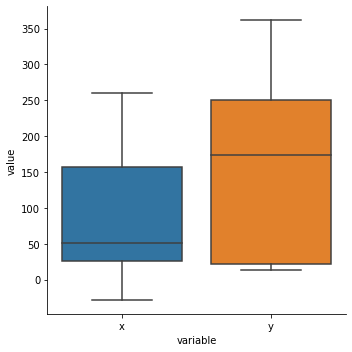

In [86]:
sns.catplot(data=dists, x="variable", y="value", kind="box")

But what about with 100 samples:

5 samples comparing x (5 samples from a normal distribution with a mean of 100) to y (5 samples from a normal distribution with a mean of 200)
Ttest_indResult(statistic=-5.763408869758629, pvalue=3.1203518250675766e-08)


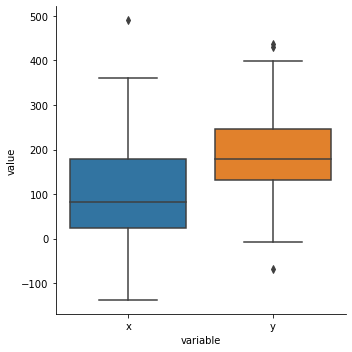

In [87]:
print("5 samples comparing x (5 samples from a normal distribution with a mean of 100) to y (5 samples from a normal distribution with a mean of 200)")
print(stats.ttest_ind(lotsof_dists[lotsof_dists['variable']=="x"].value, lotsof_dists[lotsof_dists['variable']=="y"].value))
sns.catplot(data=lotsof_dists, x="variable", y="value", kind="box")

Now we can see we can reject the null hypothesis that these samples have the same mean, that samples with the same mean with these kinds of distribution only have a 3.12e-8 probability.

But these are all simulated data - how do we do this on "real" data - let's go back to our good ol' penguins data set

In [92]:
penguin=pd.read_excel('../data/penguin.xlsx')
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's do a simple test - let's look at body mass between male and female penguins

Ttest_indResult(statistic=8.541720337994512, pvalue=4.897246751596365e-16)


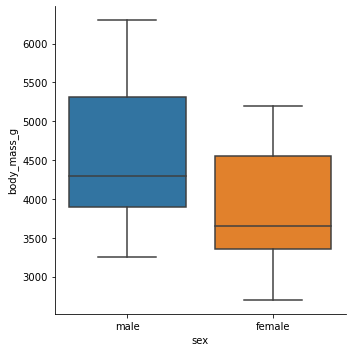

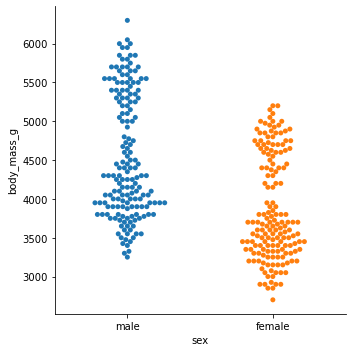

In [95]:
print(stats.ttest_ind(penguin[penguin['sex']=="male"].body_mass_g, penguin[penguin['sex']=="female"].body_mass_g))
sns.catplot(data=penguin, x="sex", y="body_mass_g", kind="box")
sns.catplot(data=penguin, x="sex", y="body_mass_g", kind="swarm")

Looks like they are different! But what's this I notice in the swarm plot - I see two separate distributions in both sex samples?

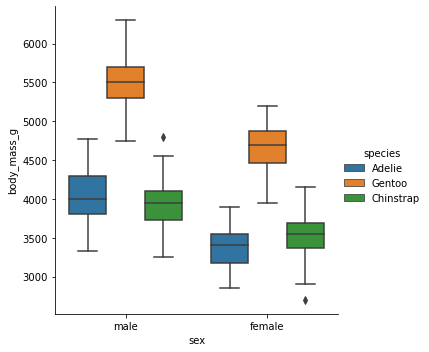

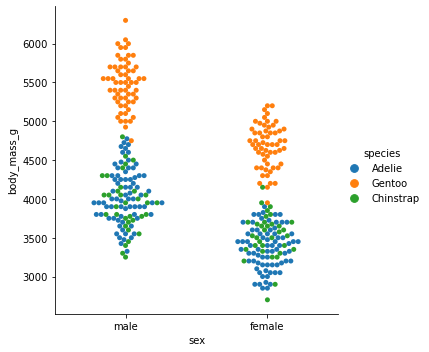

In [97]:
sns.catplot(data=penguin, x="sex", y="body_mass_g", hue="species", kind="box")
sns.catplot(data=penguin, x="sex", y="body_mass_g", hue="species", kind="swarm")

Oh - look it's due to species?  The Adelie and Chinstrap seem to have largely similar distributions, but the gentoo are significantly larger.  But we don't have to test this by eye, let's test for female penguins between the 3 distributions:

In [108]:
male_penguin=penguin[penguin['sex']=="male"]
male_adelie=male_penguin[male_penguin['species']=="Adelie"]
male_gentoo=male_penguin[male_penguin['species']=="Gentoo"]
male_chinstrap=male_penguin[male_penguin['species']=="Chinstrap"]

Comparing the Adelie and the Gentoo:

In [109]:
print(stats.ttest_ind(male_adelie.body_mass_g, male_gentoo.body_mass_g))

Ttest_indResult(statistic=-25.031352652695507, pvalue=5.752829765553558e-52)


And now comparing the Adelie and the Chinstrap:

In [110]:
print(stats.ttest_ind(male_adelie.body_mass_g, male_chinstrap.body_mass_g))

Ttest_indResult(statistic=1.4313516704052645, pvalue=0.15529920658644994)


So from this we can't reject the null hypothesis that the Chinstrap and Adelie male penguins have the same mean body mass. What about the female?

In [113]:
female_adelie=penguin[(penguin.sex=="female")&(penguin.species=="Adelie")]
female_chinstrap=penguin[(penguin.sex=="female")&(penguin.species=="Chinstrap")]
print(stats.ttest_ind(female_adelie.body_mass_g, female_chinstrap.body_mass_g))

Ttest_indResult(statistic=-2.7787510957980683, pvalue=0.0064662290599849254)


pca

In [1]:
lmfit

NameError: name 'lmfit' is not defined